In [32]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt

In [33]:
tab = pd.read_csv('../GalacticCenterDistance_Extragal/GC_2023_HolgerBaumgardt.csv', comment='#', delim_whitespace=True)

/tmp/ipykernel_7159/686147783.py:1: FutureWarning:

The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead



In [34]:
tab

,Cluster,RA,DEC,R_Sun,DRSun,R_GC,DRGC,N_RV,N_PM,Mass,...,M_High,MF,Delta_MF,sig0,vesc,etac,etah,A_Rot,Delta_AR,P_Rot
0,NGC_104,6.02379,-72.08131,4.52,0.03,7.52,0.01,7177,27460,853000.0,...,0.86,-0.65,0.12,11.9,47.4,-0.40,-0.04,5.00,0.32,100.0
1,NGC_288,13.18850,-26.58261,8.99,0.09,12.21,0.06,549,2637,96200.0,...,0.82,-0.66,0.11,3.1,10.9,-0.31,-0.10,0.42,0.32,84.3
2,NGC_362,15.80942,-70.84878,8.83,0.10,9.62,0.06,2342,4286,252000.0,...,0.82,-0.76,0.13,8.6,34.0,-0.38,-0.11,0.51,0.56,53.0
3,Whiting_1,30.73750,-3.25278,30.59,1.17,35.15,1.11,3,0,1370.0,...,0.99,-1.16,0.60,0.3,1.1,-0.16,-0.03,NaN,NaN,NaN
4,NGC_1261,48.06754,-55.21622,16.40,0.19,18.28,0.17,345,3179,172000.0,...,0.83,-0.61,0.13,5.7,21.4,-0.34,-0.11,0.90,0.64,86.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162,NGC_7089,323.36258,-0.82325,11.69,0.11,10.54,0.08,3931,5331,624000.0,...,0.78,-0.87,0.16,11.1,43.6,-0.37,-0.08,3.01,0.70,100.0
163,NGC_7099,325.09213,-23.17986,8.46,0.09,7.36,0.04,2902,2021,121000.0,...,0.77,-0.75,0.13,5.9,21.0,-0.39,-0.08,1.10,0.40,100.0
164,Pal_12,326.66180,-21.25261,18.49,0.30,15.28,0.26,24,0,6190.0,...,0.84,-0.61,0.15,0.7,2.5,-0.22,-0.11,NaN,NaN,NaN
165,Pal_13,346.68519,12.77154,23.48,0.40,24.57,0.36,20,0,2780.0,...,0.78,0.29,0.22,0.5,1.8,-0.33,-0.05,NaN,NaN,NaN


In [35]:
tab['s2noise_distance'] = tab['R_Sun']/tab['DRSun']

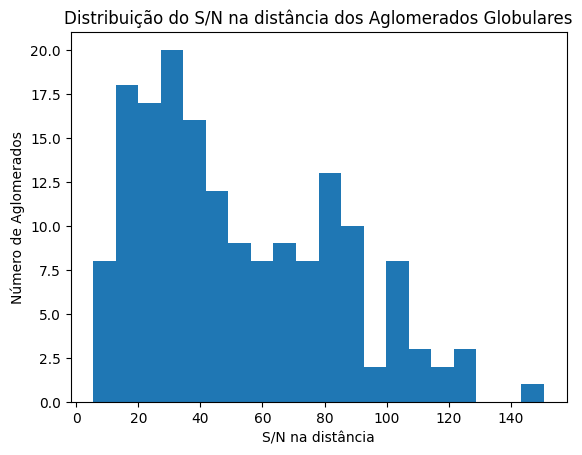

In [36]:
plt.hist(tab['s2noise_distance'], bins=20)
plt.xlabel('S/N na distância')
plt.ylabel('Número de Aglomerados')
plt.title('Distribuição do S/N na distância dos Aglomerados Globulares')
plt.show()

In [37]:
import pandas as pd
from astropy.coordinates import SkyCoord
import astropy.units as u

coords = SkyCoord(
    ra=tab["RA"].values,         # valores em graus, ainda sem unidade
    dec=tab["DEC"].values,       # valores em graus
    unit=(u.deg, u.deg),         # diz que ra e dec estão em graus
    distance=tab["R_Sun"].values * u.kpc,  # ou R_GC, depende do que você quer usar
    frame="icrs",
)

print(coords)
gal = coords.galactic
print(gal)

<SkyCoord (ICRS): (ra, dec, distance) in (deg, deg, kpc)
    [(  6.02379, -7.208131e+01,   4.52),
     ( 13.1885 , -2.658261e+01,   8.99),
     ( 15.80942, -7.084878e+01,   8.83),
     ( 30.7375 , -3.252780e+00,  30.59),
     ( 48.06754, -5.521622e+01,  16.4 ),
     ( 53.3335 ,  7.958105e+01,  11.18),
     ( 58.75959, -4.961528e+01, 118.91),
     ( 66.18561, -2.118678e+01,  84.68),
     ( 71.52462,  3.138150e+01,  26.17),
     ( 78.52816, -4.004655e+01,  11.95),
     ( 81.04584, -2.452442e+01,  13.08),
     (102.24754, -3.600531e+01,   9.83),
     (114.53529,  3.888194e+01,  88.47),
     (136.9869 , -3.722660e+01,  36.53),
     (138.01291, -6.486349e+01,  10.06),
     (140.23779, -7.728189e+01,   7.88),
     (151.38162,  7.167000e-02,  94.84),
     (154.40343, -4.641248e+01,   4.74),
     (172.31833,  2.897337e+01, 101.39),
     (174.06875, -1.087697e+01, 147.23),
     (182.52626,  1.854264e+01,  18.54),
     (186.4391 , -7.265908e+01,   5.71),
     (189.6675 , -5.115028e+01,  20.71),


In [38]:
import numpy as np
from astropy.coordinates import SkyCoord
import astropy.units as u

gal = coords.galactic
l = gal.l.radian; b = gal.b.radian; d = coords.distance.value
x = d*np.cos(b)*np.cos(l)
y = d*np.cos(b)*np.sin(l)
z = d*np.sin(b)
P = np.c_[x,y,z]

In [39]:
c_mean = P.mean(axis=0)
R0_mean = np.linalg.norm(c_mean)

In [40]:
import numpy as np

# ---------------------------------------------------------------------
# 1. Implementação robusta do algoritmo de Weiszfeld (mediana geométrica)
# ---------------------------------------------------------------------
def geometric_median(X, eps=1e-6, itmax=10000):
    """
    Geometric median via Weiszfeld algorithm.
    X: array (n, d) com coordenadas dos pontos
    eps: tolerância para convergência
    """
    X = np.asarray(X, dtype=float)
    y = X.mean(axis=0)  # chute inicial

    for _ in range(itmax):
        D = np.linalg.norm(X - y, axis=1)

        # Caso especial: y coincide com algum ponto da amostra
        zero_mask = D < 1e-15
        if np.any(zero_mask):
            return X[zero_mask][0]

        W = 1.0 / np.clip(D, 1e-12, None)
        y1 = (X * W[:, None]).sum(axis=0) / W.sum()

        if np.linalg.norm(y1 - y) < eps:
            return y1
        
        y = y1

    return y  # retorna última estimativa, caso não converga totalmente


# --------------------------------------------------------------
# 2. Função para estimar o centro galáctico + bootstrap de R0
# --------------------------------------------------------------
def estimate_galactic_center(P, B=1100, seed=42):
    """
    P: array (N,3) com coordenadas cartesianas dos aglomerados.
    B: número de bootstraps.
    """
    # Mediana geométrica dos dados originais
    c_med = geometric_median(P)
    R0_med = np.linalg.norm(c_med)

    # Bootstrap
    rng = np.random.default_rng(seed)
    centers = np.empty((B, 3))

    N = len(P)
    for b in range(B):
        idx = rng.integers(0, N, N)  # bootstrap com reposição
        centers[b] = geometric_median(P[idx])

    # Distância solar → centro galáctico para cada bootstrap
    R0_boot = np.linalg.norm(centers, axis=1)

    # Intervalos de confiança (percentis)
    R0_ci = np.percentile(R0_boot, [16, 50, 84])

    return c_med, R0_med, R0_ci, centers, R0_boot


In [41]:
c_med, R0_med, R0_ci, centers, R0_boot = estimate_galactic_center(P)

print("\n============= RESULTADOS =============")
print(f"Centro galáctico estimado (mediana geométrica):")
print(f"X = {c_med[0]:.3f} kpc")
print(f"Y = {c_med[1]:.3f} kpc")
print(f"Z = {c_med[2]:.3f} kpc\n")

print(f"Distância ao centro galáctico R0 = {R0_med:.3f} kpc")
print(f"Intervalos de confiança (16–50–84%):")
print(f"{R0_ci}")

print(f"\nIncertezas:")
print(f"+ {R0_ci[2] - R0_ci[1]:.3f}  /  - {R0_ci[1] - R0_ci[0]:.3f}  kpc")


============= RESULTADOS =============
Centro galáctico estimado (mediana geométrica):
X = 7.340 kpc
Y = -0.146 kpc
Z = 0.072 kpc

Distância ao centro galáctico R0 = 7.342 kpc
Intervalos de confiança (16–50–84%):
[7.10927941 7.35415029 7.60148265]

Incertezas:
+ 0.247  /  - 0.245  kpc


In [42]:
print(f"R0 (centroide): {R0_mean:.3f} kpc")
print(f"R0 (mediana geométrica): {R0_med:.3f} kpc")
print(f"R0 (mediana geométrica, IC 68%): {R0_ci[1]:.3f} (+{R0_ci[2]-R0_ci[1]:.3f}/-{R0_ci[1]-R0_ci[0]:.3f}) kpc")

R0 (centroide): 7.132 kpc
R0 (mediana geométrica): 7.342 kpc
R0 (mediana geométrica, IC 68%): 7.354 (+0.247/-0.245) kpc


In [46]:
import numpy as np
import plotly.graph_objects as go

# padding automático (~30% de folga)
pad = 0.3

xr = [np.min(x), np.max(x)]
yr = [np.min(y), np.max(y)]
zr = [np.min(z), np.max(z)]

xpad = (xr[1] - xr[0]) * pad
ypad = (yr[1] - yr[0]) * pad
zpad = (zr[1] - zr[0]) * pad

fig = go.Figure()

fig.add_scatter3d(x=x, y=y, z=z, mode='markers',
                  marker=dict(size=3), name='GCs')

fig.add_scatter3d(x=[0], y=[0], z=[0], mode='markers',
                  marker=dict(size=6, symbol='diamond'), name='Sol')

fig.add_scatter3d(x=[c_med[0]], y=[c_med[1]], z=[c_med[2]], mode='markers',
                  marker=dict(size=6, symbol='x'), name='Centro (mediana)')

fig.update_layout(
    scene_aspectmode='data',
    scene=dict(
        xaxis=dict(title='x [kpc]', range=[xr[0]-xpad, xr[1]+xpad]),
        yaxis=dict(title='y [kpc]', range=[yr[0]-ypad, yr[1]+ypad]),
        zaxis=dict(title='z [kpc]', range=[zr[0]-zpad, zr[1]+zpad]),
    ),
)

fig.show()